In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cv2


image1 = np.load('/Users/joshking/Downloads/T4_scan_data_res_300_win_300.p', allow_pickle=True)
image2 = np.load('/Users/joshking/Downloads/T4_scan_data_res_320_win_320.p', allow_pickle=True)
image3 = np.load('/Users/joshking/Downloads/T4_scan_data_res_350_win_350.p', allow_pickle=True)
image4 = np.load('/Users/joshking/Downloads/T4_scan_data_res_400_win_400_sep.p', allow_pickle=True)
image5 = np.load('/Users/joshking/Downloads/T4_scan_data_res_480_win_480.p', allow_pickle=True)

variables=[image1, image2, image3, image4, image5]


image1.shape


(300, 300)

In [2]:
import tensorflow as tf
def normalise(x):
    x = tf.image.per_image_standardization(x)
    return x

In [3]:
print('Data Type: %s' % image1.dtype)
print('Min: %.11f, Max: %.11f' % (image1.min(), image1.max()))
minim=image1.min()
maxim=image1.max()
# normalize to the range 0-1
image1= (image1-minim)/(maxim-minim)
# confirm the normalization
print('Min: %.14f, Max: %.14f' % (image1.min().min(), image1.min().max()))


# for x in variables:
#     x = normalise(x) 
    

Data Type: float64
Min: -0.00000000021, Max: 0.00000000104
Min: 0.00000000000000, Max: 0.00000000000000


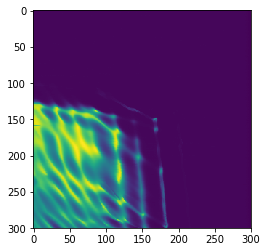

In [4]:
plt.imshow(image1)

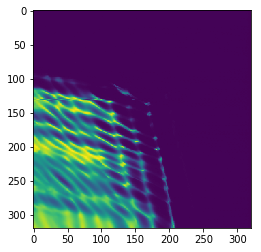

In [5]:
plt.imshow(image2)

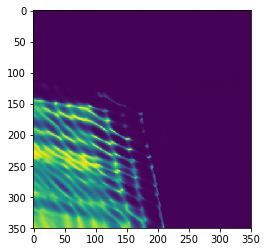

In [6]:
plt.imshow(image3)

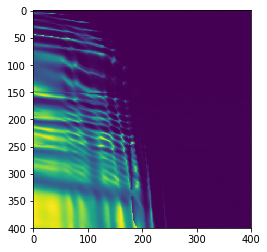

In [7]:
plt.imshow(image4)

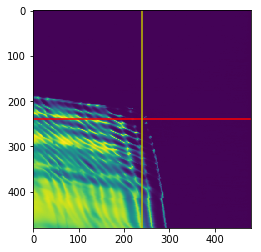

In [8]:
plt.imshow(image5)
x=np.arange(480)
y=np.full(480,240)

x2=np.full(480,240) 
y2=np.arange(480)

plt.plot(x,y,color='r')
plt.plot(x2,y2,color='y')

240


Text(0.5,1,'1D scan: Horizontal')

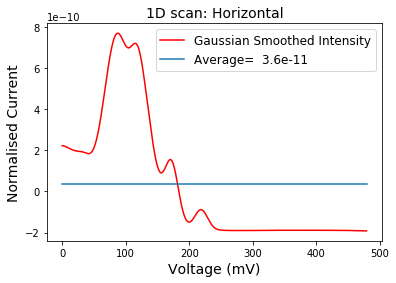

In [51]:
image5.shape
half_im_size=int(len(image5[0,:])/2)
print(half_im_size)

middle_row=image5[half_im_size,:]
middle_row
x=np.arange(480)

from scipy.ndimage.filters import gaussian_filter1d

fig, ax = plt.subplots()
ysmoothed = gaussian_filter1d(middle_row, sigma=10)
ax.plot(x, ysmoothed,color='r', label='Gaussian Smoothed Intensity')

average_mid_row=(sum(middle_row)/(int(len(middle_row))))
x_1=np.arange(480)
y_1=np.full(480,average_mid_row)
ax.plot(x_1,y_1,label='Average=  '+str(round(average_mid_row,12)))
legend = ax.legend(loc='upper right',prop={'size': 12})
ax.set_ylabel('Normalised Current', fontsize=14)
ax.set_xlabel('Voltage (mV)', fontsize=14)
ax.set_title('1D scan: Horizontal', fontsize=14)

#plt.plot(x,middle_row)
#help(plt.plot)

#then take all of these and average each to find the desired average. 
#or fidnt he transition current going from none to high? (pinch off?)

240
(480,)


Text(0.5,1,'1D scan: Vertical')

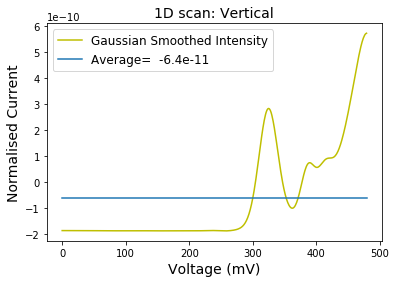

In [52]:
image5.shape
half_im_size=int(len(image5[0,:])/2)
print(half_im_size)

middle_col=image5[:,half_im_size]
print(middle_col.shape)
x=np.arange(480)

from scipy.ndimage.filters import gaussian_filter1d

fig, bx = plt.subplots()
ysmoothed = gaussian_filter1d(middle_col, sigma=10)
bx.plot(x, ysmoothed,color='y',label='Gaussian Smoothed Intensity')

average_mid_col=(sum(middle_col)/(int(len(middle_col))))
x_1=np.arange(480)
y_1=np.full(480,average_mid_col)
bx.plot(x_1,y_1,label='Average=  '+str(round(average_mid_col,12)))
legend = bx.legend(loc='upper left',prop={'size': 12})
bx.set_ylabel('Normalised Current', fontsize=14)
bx.set_xlabel('Voltage (mV)', fontsize=14)
bx.set_title('1D scan: Vertical', fontsize=14)

200


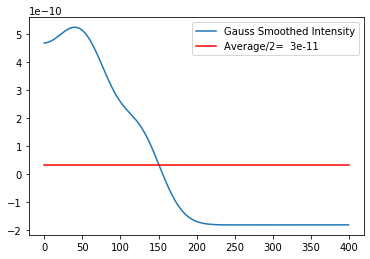

In [30]:
image4.shape
half_im_size=int(len(image4[0,:])/2)
print(half_im_size)

middle_row=image4[half_im_size,:]
middle_row
x=np.arange(400)

from scipy.ndimage.filters import gaussian_filter1d

fig, ax = plt.subplots()
ysmoothed = gaussian_filter1d(middle_row, sigma=25)
ax.plot(x, ysmoothed,label='Gauss Smoothed Intensity')

average_mid_row=(sum(middle_row)/(int(len(middle_row))))
x_1=np.arange(400)
y_1=np.full(400,average_mid_row)
ax.plot(x_1,y_1,color='r',label='Average/2=  '+str(round(average_mid_row,12)))
legend = ax.legend(loc='upper right')


#plt.plot(x,middle_row)
#help(plt.plot)

#then take all of these and average each to find the desired average. 
#or fidnt he transition current going from none to high? (pinch off?)